In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

image_dir  = 'Banana FCN/Images/Images'
mask_dir = 'Banana FCN/Mask/Mask'
img_size=(128, 128)

## Dataset

In [13]:


# Load images
image_ds = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels=None,
    image_size=img_size,
    batch_size=None,
    shuffle=False
)

# Load masks
mask_ds = tf.keras.utils.image_dataset_from_directory(
    mask_dir,
    labels=None,
    color_mode='grayscale',
    image_size=img_size,
    batch_size=None,
    shuffle=False
)

dataset = tf.data.Dataset.zip((image_ds, mask_ds))

Found 82 files.
Found 82 files.


## Images and Masks

In [14]:
# Convert to numpy arrays for train_test_split
images = []
masks = []
for img, mask in dataset:
    images.append(img.numpy())
    masks.append(mask.numpy())

images = np.array(images) / 255.0  # Normalize
masks = np.array(masks) / 255.0   # Normalize
masks = (masks > 0.5).astype(np.float32)  # Binary mask

## Train Test Split

In [15]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)


## Model

In [16]:
model = tf.keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(128, 128, 3)),
        layers.Conv2D(1, 1, activation='sigmoid', padding='same')
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50, #sastra bro
    batch_size=8,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7161 - loss: 0.5802 - val_accuracy: 0.6938 - val_loss: 0.5628
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7115 - loss: 0.5643 - val_accuracy: 0.6938 - val_loss: 0.5571
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6945 - loss: 0.5725 - val_accuracy: 0.6938 - val_loss: 0.5500
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6967 - loss: 0.5680 - val_accuracy: 0.6938 - val_loss: 0.5441
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6992 - loss: 0.5611 - val_accuracy: 0.6938 - val_loss: 0.5381
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7116 - loss: 0.5488 - val_accuracy: 0.6962 - val_loss: 0.5323
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6991 - loss: 0.5595 - val_accuracy: 0.7207 - val_loss: 0.5277
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7216 - loss: 0.5435 - val_accuracy: 0.7418 - val_loss: 0.5232
Epoch 9/50

## Show an Image

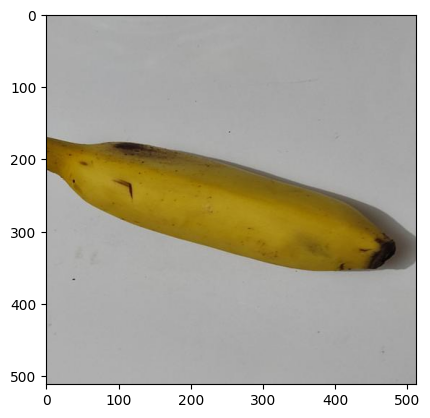

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Banana FCN/Images/Images/25.jpg')
plt.imshow(img)

## Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
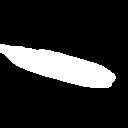

In [18]:
# Prediction function
def predict_mask(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(128, 128))
    img = tf.keras.utils.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    predicted_mask = model.predict(img)
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8) * 255

    return predicted_mask[0, :, :, 0]

predict_mask('Banana FCN/Images/Images/25.jpg')